# **NOTE:** Use File > Save a copy in Drive to make a copy before doing anything else


# Project 6: Advanced Text Analysis with SpaCy

### Overview

In this project, we will enhance our text analysis techniques by applying proper data pre-processing to extract more meaningful information from literary texts. We'll continue working with the first two chapters of "Pride and Prejudice" but will implement advanced text cleaning methods using the SpaCy library to obtain more insightful word frequency results.

### Project Objectives

*   Apply proper text pre-processing techniques to extract
meaningful words

*   Use SpaCy to clean and normalize text data
*   Identify the 15 most frequently used meaningful words in a text

*   Analyze how pre-processing affects text analysis results
*   Apply the same techniques to a text of your choice

### Part 0: Text analysis without text cleaning (Lab6)

#### Loading Data

We will fetch the first two chapters of Jane Austen's Pride and Prejudice from [Project Gutenberg](https://www.gutenberg.org/ebooks/1342)


#### Function to fetch data

In [91]:
def fetch_text(raw_url):
  import requests
  from pathlib import Path
  import hashlib

  CACHE_DIR = Path("cs_110_content/text_cache")
  CACHE_DIR.mkdir(parents=True, exist_ok=True)

  def _url_to_filename(url):
    url_hash = hashlib.sha1(url.encode("utf-8")).hexdigest()[:12]
    return CACHE_DIR / f"{url_hash}.txt"

  cache_path = _url_to_filename(raw_url)

  SUCCESS_MSG = "✅ Text fetched."
  FAILURE_MSG = "❌ Failed to fetch text."
  try:
    if not cache_path.exists():
      response = requests.get(raw_url, timeout=10)
      response.raise_for_status()
      text_data = response.text
      cache_path.write_text(text_data, encoding="utf-8")
    print(SUCCESS_MSG)
    return cache_path.read_text(encoding="utf-8")

  except Exception as e:
    print(FAILURE_MSG)
    print(f"Error: {e}")
    return ""

#### Save the text in a variable

In [92]:
Winne_the_Pooh_URL = "https://www.gutenberg.org/cache/epub/67098/pg67098.txt"
Winnie_the_Pooh_text = fetch_text(Winne_the_Pooh_URL)

✅ Text fetched.


#### Statistics about the data

In [93]:
def print_text_stats(text):
  num_chars = len(text)

  lines = text.splitlines()
  num_lines = len(lines)

  num_words = 0
  for line in lines:
    words_in_line = line.split()
    num_words_in_line = len(words_in_line)
    num_words += num_words_in_line

  print(f"Number of characters: {num_chars}")
  print(f"Number of lines: {num_lines}")
  print(f"Number of words: {num_words}")

print_text_stats(Winnie_the_Pooh_text)

Number of characters: 148999
Number of lines: 4039
Number of words: 26108


In [94]:
def get_word_counts(text):
  word_counts = {}
  lines = text.splitlines()
  for line in lines:
    words = line.split()
    for word in words:
      word = word.lower()
      if word in word_counts:
        word_counts[word] += 1
      else:
        word_counts[word] = 1
  return word_counts

word_counts = get_word_counts(Winnie_the_Pooh_text)
print(word_counts)

{'\ufeffthe': 1, 'project': 86, 'gutenberg': 28, 'ebook': 12, 'of': 513, 'winnie-the-pooh': 36, 'this': 120, 'is': 119, 'for': 157, 'the': 890, 'use': 17, 'anyone': 6, 'anywhere': 3, 'in': 324, 'united': 17, 'states': 12, 'and': 998, 'most': 11, 'other': 43, 'parts': 3, 'world': 4, 'at': 162, 'no': 31, 'cost': 3, 'with': 167, 'almost': 4, 'restrictions': 3, 'whatsoever.': 3, 'you': 324, 'may': 21, 'copy': 9, 'it,': 47, 'give': 19, 'it': 371, 'away': 12, 'or': 123, 're-use': 3, 'under': 11, 'terms': 23, 'license': 13, 'included': 3, 'online': 7, 'www.gutenberg.org.': 5, 'if': 118, 'are': 67, 'not': 57, 'located': 9, 'states,': 5, 'will': 36, 'have': 79, 'to': 635, 'check': 5, 'laws': 10, 'country': 5, 'where': 29, 'before': 12, 'using': 8, 'ebook.': 3, 'title:': 2, 'author:': 2, 'a.': 16, 'milne': 4, 'illustrator:': 2, 'ernest': 2, 'h.': 6, 'shepard': 3, 'release': 2, 'date:': 2, 'january': 2, '3,': 2, '2022': 2, '[ebook': 2, '#67098]': 2, 'recently': 2, 'updated:': 2, 'december': 1, '3

In [95]:
# prompt: Make a new Code Cell below and use Gemini to create a new function called print_top_10_frequent_words that will call the above get_word_counts() and print only the top 10 frequent words.

import operator

def print_top_15_frequent_words(text):
    word_counts = get_word_counts(text)
    sorted_word_counts = dict(sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True))
    top_15_words = list(sorted_word_counts.items())[:15]  # Get the top 10 words and counts
    for word, count in top_15_words:
        print(f"{word}: {count}")

print_top_15_frequent_words(Winnie_the_Pooh_text)

and: 998
the: 890
to: 635
he: 634
a: 588
of: 513
said: 445
it: 371
in: 324
you: 324
was: 288
i: 273
his: 220
that: 212
as: 185


### Part 1: Analyzing "Pride and Prejudice" with Pre-processing

In our previous lab, we simply counted word frequencies without any sophisticated pre-processing, resulting in common but uninformative words (like "the", "and", "to") dominating our results.

You will use SpaCy, a powerful Natural Language Processing library, to perform these operations. SpaCy provides pre-trained models that can handle tokenization, stop word removal, and lemmatization automatically.





In [ ]:
# install spacy library
#!pip install spacy (uncomment it to install)

In [96]:
# bring the spacy library into scope
import spacy

In [97]:
# Load a SpaCy model
nlp = spacy.load('en_core_web_sm')

Explanation:

spacy: This is the spaCy library, a popular and efficient NLP library in Python.

load(): This function loads a pre-trained NLP model.

'en_core_web_sm': This is the name of the small English-language model. It's a lightweight model that includes:

*   Tokenization (splitting text into words, punctuation, etc.)

*  Part-of-speech (POS) tagging

*  Named entity recognition (NER) etc

nlp: This variable now holds the loaded model.

In [98]:
def word_tokenization_normalization(text):

    text = text.lower()
    doc = nlp(text)

    words_normalized = []
    for word in doc:
        if word.text != '\n' \
        and not word.is_stop \
        and not word.is_punct \
        and not word.like_num \
        and len(word.text.strip()) > 2:
            word_lemmatized = str(word.lemma_)
            words_normalized.append(word_lemmatized)

    return words_normalized

#### TODO

1. Use "Explain Code" AI feature to understand what this function, *word_tokenization_normalization(text)* does and write a short summary of about what it does. You may use bullet points. (Please create another text cell under this cell to write the summary.)

#### TODO

2. Use this function to get meaningful words from pride_prejudice_text. All you need to do is call the function with the correct input text. (Please create a code cell under this cell to accomplish it.)

In [99]:
word_tokenization_normalization(Winnie_the_Pooh_text)

['\ufeffthe',
 'project',
 'gutenberg',
 'ebook',
 'winnie',
 'pooh',
 'ebook',
 'use',
 'united',
 'states',
 'part',
 'world',
 'cost',
 'restriction',
 'whatsoever',
 'copy',
 'away',
 'use',
 'term',
 'project',
 'gutenberg',
 'license',
 'include',
 'ebook',
 'online',
 'www.gutenberg.org',
 'locate',
 'united',
 'states',
 'check',
 'law',
 'country',
 'locate',
 'ebook',
 'title',
 'winnie',
 'pooh',
 'author',
 'milne',
 'illustrator',
 'ernest',
 'shepard',
 'release',
 'date',
 'january',
 'ebook',
 'recently',
 'update',
 'december',
 'language',
 'english',
 'original',
 'publication',
 'canada',
 'mcclelland',
 'stewart',
 'ltd',
 'credit',
 'greg',
 'week',
 'mary',
 'meehan',
 'iona',
 'vaughan',
 'david',
 'jones',
 'online',
 'distribute',
 'proofreaders',
 'canada',
 'team',
 'http://www.pgdpcanada.net',
 'start',
 'project',
 'gutenberg',
 'ebook',
 'winnie',
 'pooh',
 'project',
 'gutenberg',
 'ebook',
 'winnie',
 'pooh',
 'milne',
 'ebook',
 'use',
 'united',
 'sta

#### TODO

3. Make a new Code Cell below and use Gemini to create a new function called *create_word_frequency_dict* from the result you got from the previous task. This function should return a word frequency dictionary, meaning this is a fruitful function.

def create_word_frequency_dict(words):
    word_frequency_dict = {word_tokenization_normalization}
    return word_frequency_dict

create_word_frequency_dict(word_tokenization_normalization)
print(create_word_frequency_dict(word_tokenization_normalization))

In [100]:
def create_word_frequency_dict(words):
  word_frequency_dict = {word_tokenization_normalization}
  return word_frequency_dict

create_word_frequency_dict(word_tokenization_normalization)
print (create_word_frequency_dict)

<function create_word_frequency_dict at 0x7a0e8b173d80>


#### TODO

4. Make a new Code Cell below and use Gemini to create a new function called *print_top_words* to print out the result as shown below (This is just a print function):

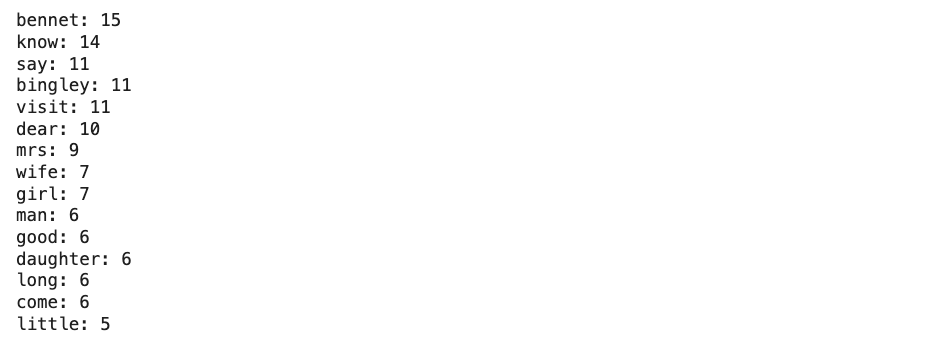

In [101]:
def print_top_words(word_frequency_dict):
    sorted_word_counts = dict(sorted(word_frequency_dict.items(), key=operator.itemgetter(1), reverse=True))
    top_10_words = list(sorted_word_counts.items())[:10]
    for word, count in top_10_words:
        print(f"{word}: {count}")

print_top_words(word_frequency_dict)

say: 592
pooh: 442
piglet: 226
robin: 165
christopher: 164
think: 153
eeyore: 121
go: 116
rabbit: 113
look: 105


### Part 2: Text Analysis of your choice with pre-processing

For the second part of the project, you will:

* Choose another text that interests you (a novel, article, speech, etc.) (You should make another copy of this colab file and change the name to CS110_Project6_Part2.ipynb)
* Produce 10 to 15 most frequrently used words without text preprocessing
* Apply the same pre-processing steps using SpaCy
* Identify the 15 most frequently used meaningful words
* Write a 1-2 paragraph analysis of what these words reveal about the text's content and themes, and why we need text pre-processing now that you have worked on at least two sets of text

In [79]:
def fetch_text(raw_url):
  import requests
  from pathlib import Path
  import hashlib

  CACHE_DIR = Path("cs_110_content/text_cache")
  CACHE_DIR.mkdir(parents=True, exist_ok=True)

  def _url_to_filename(url):
    url_hash = hashlib.sha1(url.encode("utf-8")).hexdigest()[:12]
    return CACHE_DIR / f"{url_hash}.txt"

  cache_path = _url_to_filename(raw_url)

  SUCCESS_MSG = "✅ Text fetched."
  FAILURE_MSG = "❌ Failed to fetch text."
  try:
    if not cache_path.exists():
      response = requests.get(raw_url, timeout=10)
      response.raise_for_status()
      text_data = response.text
      cache_path.write_text(text_data, encoding="utf-8")
    print(SUCCESS_MSG)
    return cache_path.read_text(encoding="utf-8")

  except Exception as e:
    print(FAILURE_MSG)
    print(f"Error: {e}")
    return ""

Winne_the_Pooh_URL = "https://www.gutenberg.org/cache/epub/67098/pg67098.txt"
Winnie_the_Pooh_text = fetch_text(Winne_the_Pooh_URL)

def print_text_stats(text):
  num_chars = len(text)

  lines = text.splitlines()
  num_lines = len(lines)

  num_words = 0
  for line in lines:
    words_in_line = line.split()
    num_words_in_line = len(words_in_line)
    num_words += num_words_in_line

  print(f"Number of characters: {num_chars}")
  print(f"Number of lines: {num_lines}")
  print(f"Number of words: {num_words}")

print_text_stats(Winnie_the_Pooh_text)

def get_word_counts(text):
  word_counts = {}
  lines = text.splitlines()
  for line in lines:
    words = line.split()
    for word in words:
      word = word.lower()
      if word in word_counts:
        word_counts[word] += 1
      else:
        word_counts[word] = 1
  return word_counts

word_counts = get_word_counts(Winnie_the_Pooh_text)
print(word_counts)

import operator

def print_top_15_frequent_words(text):
    word_counts = get_word_counts(text)
    sorted_word_counts = dict(sorted(word_counts.items(), key=operator.itemgetter(1), reverse=True))
    top_15_words = list(sorted_word_counts.items())[:15]  # Get the top 10 words and counts
    for word, count in top_15_words:
        print(f"{word}: {count}")

print_top_15_frequent_words(Winnie_the_Pooh_text)

import operator

import spacy
nlp = spacy.load('en_core_web_sm')

def word_tokenization_normalization(text):

    text = text.lower()
    doc = nlp(text)

    words_normalized = []
    for word in doc:
        if word.text != '\n' \
        and not word.is_stop \
        and not word.is_punct \
        and not word.like_num \
        and len(word.text.strip()) > 2:
            word_lemmatized = str(word.lemma_)
            words_normalized.append(word_lemmatized)

    return words_normalized

word_tokenization_normalization(Winnie_the_Pooh_text)

words_normalized = word_tokenization_normalization(Winnie_the_Pooh_text)
print(words_normalized)

def create_word_frequency_dict(words):
    word_frequency_dict = {}
    for word in words:
        if word in word_frequency_dict:
            word_frequency_dict[word] += 1
        else:
            word_frequency_dict[word] = 1
    return word_frequency_dict

word_frequency_dict = create_word_frequency_dict(words_normalized)

def create_word_frequency_dict(words):
  word_frequency_dict = {word_tokenization_normalization}
  return word_frequency_dict

create_word_frequency_dict(word_tokenization_normalization)
print (create_word_frequency_dict)

def print_top_words(word_frequency_dict):
    sorted_word_counts = dict(sorted(word_frequency_dict.items(), key=operator.itemgetter(1), reverse=True))
    top_15_words = list(sorted_word_counts.items())[:15]
    for word, count in top_15_words:
        print(f"{word}: {count}")

print_top_words(word_frequency_dict)

✅ Text fetched.
Number of characters: 148999
Number of lines: 4039
Number of words: 26108
{'\ufeffthe': 1, 'project': 86, 'gutenberg': 28, 'ebook': 12, 'of': 513, 'winnie-the-pooh': 36, 'this': 120, 'is': 119, 'for': 157, 'the': 890, 'use': 17, 'anyone': 6, 'anywhere': 3, 'in': 324, 'united': 17, 'states': 12, 'and': 998, 'most': 11, 'other': 43, 'parts': 3, 'world': 4, 'at': 162, 'no': 31, 'cost': 3, 'with': 167, 'almost': 4, 'restrictions': 3, 'whatsoever.': 3, 'you': 324, 'may': 21, 'copy': 9, 'it,': 47, 'give': 19, 'it': 371, 'away': 12, 'or': 123, 're-use': 3, 'under': 11, 'terms': 23, 'license': 13, 'included': 3, 'online': 7, 'www.gutenberg.org.': 5, 'if': 118, 'are': 67, 'not': 57, 'located': 9, 'states,': 5, 'will': 36, 'have': 79, 'to': 635, 'check': 5, 'laws': 10, 'country': 5, 'where': 29, 'before': 12, 'using': 8, 'ebook.': 3, 'title:': 2, 'author:': 2, 'a.': 16, 'milne': 4, 'illustrator:': 2, 'ernest': 2, 'h.': 6, 'shepard': 3, 'release': 2, 'date:': 2, 'january': 2, '3,'

### Deliverable

Download both notebooks by clicking on the File Menu (below the name of the file), Download > Download .ipynb and submit them.

1. CS110_Project6_Part1.ipynb with all TODO tasks done
2. CS110_Project6_Part2.ipynb with the write-up after producing 15 most frequently used meaningful words from a text of your choice